# Leaf Disease Classification

## Importing the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL as pil
pd.set_option("display.max_columns", None) # it will show all the columns in the table, otherwise it will be restricted to width of page

## Importing the data

In [5]:
train_data = pd.read_csv("train.csv")
train_data.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [6]:
train_data.shape

(21397, 2)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  21397 non-null  object
 1   label     21397 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 334.5+ KB


In [8]:
images = train_data.iloc[:,:-1].values
label = train_data.iloc[:,-1:].values
images,label

(array([['1000015157.jpg'],
        ['1000201771.jpg'],
        ['100042118.jpg'],
        ...,
        ['999474432.jpg'],
        ['999616605.jpg'],
        ['999998473.jpg']], dtype=object),
 array([[0],
        [3],
        [1],
        ...,
        [1],
        [4],
        [4]], dtype=int64))

In [9]:
images.shape, label.shape

((21397, 1), (21397, 1))

In [10]:
from sklearn.model_selection import train_test_split
train_images,test_images,train_label,test_label = train_test_split(images,label, test_size = 0.2, random_state=0)
print("Train Images =",train_images.shape)
print("Test Images =",test_images.shape)
print("Train Label =",train_label.shape)
print("Test Label =",test_label.shape)

Train Images = (17117, 1)
Test Images = (4280, 1)
Train Label = (17117, 1)
Test Label = (4280, 1)


In [11]:
print("Total Number of Training Example =",train_images.shape[0])

Total Number of Training Example = 17117


In [12]:
img_lst = []
for image in train_images:
    img = pil.Image.open("train_images/"+image[0])
    img = img.resize((70,70))
    img_lst.append(np.asarray(img))



In [13]:
img_lst

[array([[[185, 210, 162],
         [185, 209, 158],
         [185, 212, 159],
         ...,
         [179, 192, 177],
         [179, 192, 177],
         [185, 197, 182]],
 
        [[180, 208, 159],
         [179, 210, 156],
         [179, 213, 157],
         ...,
         [204, 217, 196],
         [206, 218, 198],
         [206, 217, 197]],
 
        [[177, 204, 155],
         [173, 201, 153],
         [175, 207, 155],
         ...,
         [218, 226, 235],
         [214, 223, 225],
         [201, 215, 201]],
 
        ...,
 
        [[181, 195, 158],
         [121, 149, 115],
         [ 96, 128,  97],
         ...,
         [ 21,  31,  23],
         [ 14,  29,  23],
         [ 15,  30,  23]],
 
        [[166, 183, 148],
         [ 90, 116, 103],
         [ 78, 106,  88],
         ...,
         [ 33,  52,  44],
         [ 37,  55,  47],
         [ 40,  57,  50]],
 
        [[154, 171, 138],
         [ 81, 106,  94],
         [ 80, 105,  86],
         ...,
         [ 52,  63,  51],
  

In [14]:
img_array = np.array(img_lst)

In [15]:
img_array.shape

(17117, 70, 70, 3)

In [16]:
 train_img = img_array.reshape(img_array.shape[0],-1).T

In [17]:
img_array[0]

array([[[185, 210, 162],
        [185, 209, 158],
        [185, 212, 159],
        ...,
        [179, 192, 177],
        [179, 192, 177],
        [185, 197, 182]],

       [[180, 208, 159],
        [179, 210, 156],
        [179, 213, 157],
        ...,
        [204, 217, 196],
        [206, 218, 198],
        [206, 217, 197]],

       [[177, 204, 155],
        [173, 201, 153],
        [175, 207, 155],
        ...,
        [218, 226, 235],
        [214, 223, 225],
        [201, 215, 201]],

       ...,

       [[181, 195, 158],
        [121, 149, 115],
        [ 96, 128,  97],
        ...,
        [ 21,  31,  23],
        [ 14,  29,  23],
        [ 15,  30,  23]],

       [[166, 183, 148],
        [ 90, 116, 103],
        [ 78, 106,  88],
        ...,
        [ 33,  52,  44],
        [ 37,  55,  47],
        [ 40,  57,  50]],

       [[154, 171, 138],
        [ 81, 106,  94],
        [ 80, 105,  86],
        ...,
        [ 52,  63,  51],
        [ 60,  66,  55],
        [ 46,  50,  42]]

In [18]:
train_img

array([[185,  51,  52, ...,  37, 134,  84],
       [210, 139, 126, ...,  60, 121,  66],
       [162,  60,  83, ...,  45, 134,  75],
       ...,
       [ 46,  59,  34, ...,  38,  62, 102],
       [ 50,  73, 123, ...,  50,  53, 119],
       [ 42,  38,  34, ...,  29,  36,  50]], dtype=uint8)

In [19]:
train_img.shape

(14700, 17117)

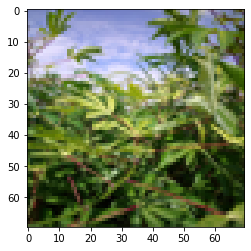

Label = 2
Index = 4159


In [20]:
import random
index = random.randint(0, train_img.shape[1])
plt.imshow(train_img[:, index].reshape(70,70,3))
plt.show()
print("Label =", train_label[index][0])
print("Index =",index)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[("column", OneHotEncoder(sparse=False), [0])], remainder="passthrough")
train_lbl = ct.fit_transform(train_label)

In [22]:
train_lbl = train_lbl.T

In [23]:
train_lbl.shape, train_img.shape, train_label.shape

((5, 17117), (14700, 17117), (17117, 1))

In [24]:
train_label[0][0], train_lbl[:,0]

(4, array([0., 0., 0., 0., 1.]))

## Initialize Parameters

### Layer Sizes

In [25]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 10000
    return n_x,n_y,n_h

In [26]:
n_x,n_y,n_h = layer_sizes(train_img,train_lbl)
print("The size of Input Layer n_x is", n_x)
print("The size of Hidden Layer n_h is", n_h)
print("The size of Output Layer n_y is", n_y)

The size of Input Layer n_x is 14700
The size of Hidden Layer n_h is 10000
The size of Output Layer n_y is 5


### Parameters

In [27]:
def intialize_parameters(n_x, n_y, n_h):
    
    W1 = np.random.randn(n_h, n_x) * 0.001
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.001
    b2 = np.zeros((n_y, 1))

    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    return parameters

In [28]:
np.random.seed(2)
parameters = intialize_parameters(n_x, n_y, n_h)
print("W1 = "+str(parameters["W1"]))
print("b1 = "+str(parameters["b1"]))
print("W2 = "+str(parameters["W2"]))
print("b2 = "+str(parameters["b2"]))

W1 = [[-4.16757847e-04 -5.62668272e-05 -2.13619610e-03 ... -9.24984808e-04
  -4.05959919e-04  8.10573395e-04]
 [ 9.94817704e-04  5.19382713e-04  3.75169953e-04 ...  8.33443262e-04
  -8.05212892e-04 -5.00874088e-04]
 [ 3.97248789e-05  1.52963107e-03 -2.52968341e-05 ...  1.49524330e-03
  -1.43527498e-03 -1.63879701e-03]
 ...
 [ 1.74950527e-03  8.74968389e-04  7.32911238e-04 ... -4.19555213e-04
   1.61763441e-03 -1.11832449e-03]
 [-1.05226396e-03 -6.82186935e-04  3.87825289e-04 ... -6.06267535e-05
  -8.83820111e-04 -2.28572343e-03]
 [-8.22906829e-05 -4.61247255e-05 -1.01435073e-03 ... -3.21245317e-04
   1.31892999e-03 -9.62089617e-04]]
b1 = [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
W2 = [[ 3.61165259e-04  4.69185697e-04 -1.14336083e-03 ...  8.45574972e-04
  -1.89699701e-04 -1.13697335e-03]
 [-2.93857725e-04  8.95074522e-04 -8.68490775e-04 ...  2.13948905e-03
   3.40697301e-04 -1.79110365e-04]
 [-6.85253978e-04 -1.58558639e-03  4.28226882e-04 ...  1.12810509e-03
   4.36306554e-04  6.564485

## Forward Propagation

In [29]:
def softmax(Z):
    expZ = np.exp(Z)
    return expZ/np.sum(expZ, axis=0)

def relu(Z):
    return np.maximum(Z,0)

def derivative_relu(Z):
    return np.array(Z > 0, dtype=np.float32)

In [30]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = W1.dot(X) + b1
    A1 = np.tanh(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    cache = {"Z1":Z1, "A1":A1, "Z2":Z2, "A2":A2}

    return A2,cache

In [31]:
A2,cache = forward_propagation(train_img, parameters)

print("A2 = "+str(A2))
print("A2 shape = "+str(A2.shape))

A2 = [[0.20950628 0.21319441 0.20076351 ... 0.22051964 0.20490323 0.24084805]
 [0.18290289 0.19227871 0.19360771 ... 0.19146471 0.17305383 0.18291325]
 [0.21239266 0.18549901 0.20121207 ... 0.19412001 0.21193839 0.18497759]
 [0.21799622 0.23276089 0.21715791 ... 0.20529365 0.22983428 0.21445594]
 [0.17720194 0.17626698 0.1872588  ... 0.18860199 0.18027027 0.17680517]]
A2 shape = (5, 17117)


## Cost Function

In [32]:
A2.shape, train_lbl.shape

((5, 17117), (5, 17117))

In [33]:
def cost_function(A, Y):
    m = Y.shape[1]

    cost = -(1/m) * np.sum(Y * np.log(A))
    return cost

In [34]:
J = cost_function(A2, train_lbl)
print(J)

1.5824722199199421


## Back Propagation

In [35]:
A1 = cache["A1"]
print("A1 =",A1.shape)
A2 = cache["A2"]
print("A2 =",A2.shape)
Z2 = cache["Z2"]
print("Z2 =",Z2.shape)
W1 = parameters["W1"]
print("W1 =",W1.shape)
W2 = parameters["W2"]
print("W2 =",W2.shape)

A1 = (10000, 17117)
A2 = (5, 17117)
Z2 = (5, 17117)
W1 = (10000, 14700)
W2 = (5, 10000)


In [36]:
def back_propagation(X, Y, parameters, cache):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    m = Y.shape[1]

    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dW1":dW1, "db1":db1, "dW2":dW2, "db2":db2}

    return gradients

In [37]:
gradients = back_propagation(train_img, train_lbl, parameters, cache)
print("dW1 =", gradients["dW1"])
print("db1 =", gradients["db1"])
print("dW2 =", gradients["dW2"])
print("db2 =", gradients["db2"])

dW1 = [[-1.04564238e-04 -1.37449452e-04 -8.64057073e-05 ... -1.30227641e-04
  -1.62115044e-04 -1.08565051e-04]
 [-1.55108187e-03 -1.81706419e-03 -1.23460308e-03 ... -1.34973250e-03
  -1.44111051e-03 -1.06028876e-03]
 [ 1.95353520e-06  2.00082429e-06  1.69992322e-06 ...  2.61528777e-06
   3.88467769e-06  2.82791093e-06]
 ...
 [-6.59856047e-06 -1.36814763e-05 -1.11624852e-08 ... -1.11566100e-05
  -1.24454149e-05 -8.83861636e-06]
 [-6.80897724e-04 -7.39879013e-04 -4.24348211e-04 ... -6.61576243e-04
  -7.11395266e-04 -5.03440103e-04]
 [-2.74111399e-03 -3.07974666e-03 -2.12839890e-03 ... -2.21592240e-03
  -2.43506660e-03 -1.63677136e-03]]
db1 = [[-1.81224517e-06]
 [-1.83172030e-05]
 [ 2.88265427e-08]
 ...
 [-2.97616530e-07]
 [-8.86587939e-06]
 [-2.92440012e-05]]
dW2 = [[-0.16012536 -0.09163717  0.17019116 ... -0.16987909  0.07631146
   0.04785131]
 [-0.08399611 -0.04757444  0.08775542 ... -0.08783763  0.03901949
   0.03173221]
 [-0.07705866 -0.04362984  0.0833735  ... -0.08317225  0.0281752

In [38]:
gradients["dW1"].shape, gradients["dW2"].shape

((10000, 14700), (5, 10000))

In [39]:
gradients["db1"].shape, gradients["db2"].shape

((10000, 1), (5, 1))

### Update Parameters

In [40]:
def update_parameters(parameters, gradients, alpha):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}

    return parameters

## Model

In [41]:
def model(X, Y, n_h, iterations, alpha, print_cost):
    
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[1]
    parameters = intialize_parameters(n_x, n_y, n_h)

    for  i in range(iterations):

        A2,cache = forward_propagation(X, parameters)
        cost = cost_function(A2, Y)
        gradients = back_propagation(X,Y,parameters,cache)
        parameters = update_parameters(parameters, gradients, alpha)

        if print_cost==1 and i%10 == 0:
            print(f"Cost after {i} iterations = {cost}.")
    
    return parameters

In [42]:
iterations = 100
alpha = 0.00001
n_h = 10000
parameters = model(train_img,train_lbl,n_h,iterations,alpha,1)

Cost after 0 iterations = 1.5858174695611014.


: 

: 